In [2]:
import numpy as np

np.exp(1)

2.718281828459045

In [6]:
# 오버플로우 발생
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))


/var/folders/nl/w3zw39ds7dd31zwwbtsny0w40000gn/T/ipykernel_82045/518197229.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
/var/folders/nl/w3zw39ds7dd31zwwbtsny0w40000gn/T/ipykernel_82045/518197229.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [11]:
# 요거는 오버플로우 발생 안함
c = np.max(a)
# 가장 큰값을 빼줌
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [16]:
x = np.arange(12)
x.reshape(3,4)
x.reshape(3, 2, 2)

x =np.array([[1,2],[3,4]])

array([[ 0, -1],
       [-2, -3]])

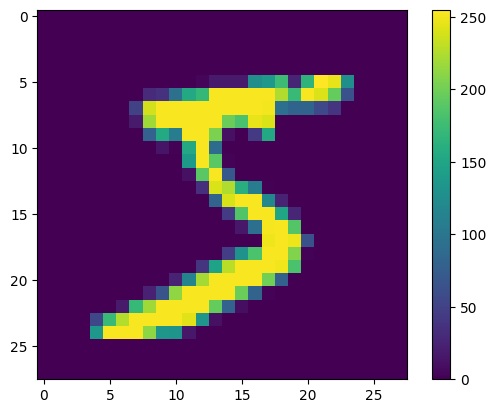

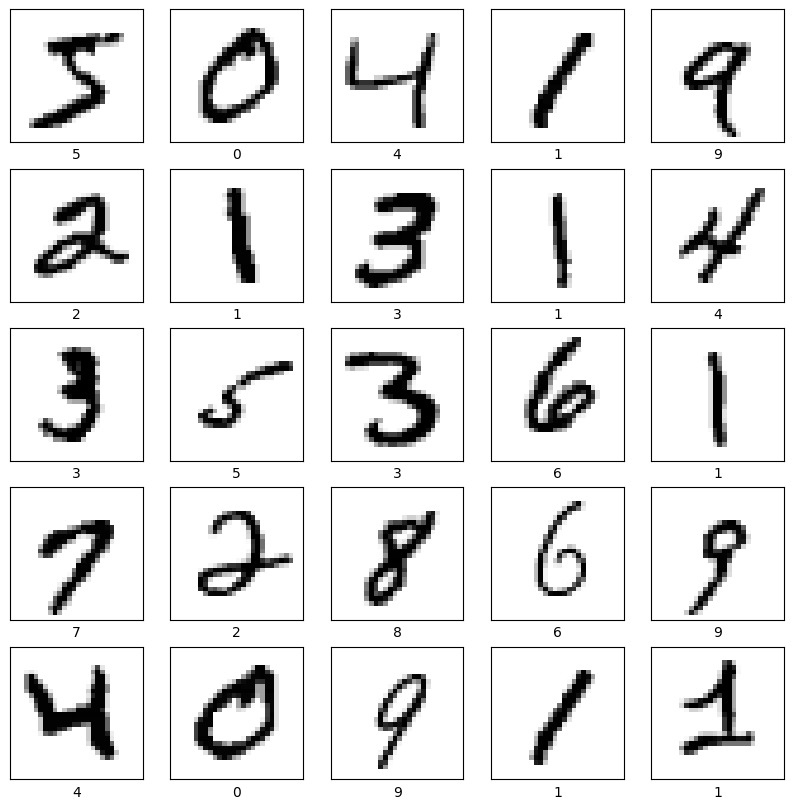

In [23]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt 

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=False)

plt.figure()
plt.imshow(x_train[0][0])
plt.colorbar()
plt.show() 

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([]) # 눈금 제거
    plt.yticks([]) # 눈금 제거
    plt.imshow(x_train[i][0], cmap=plt.cm.binary)
    plt.xlabel(t_train[i])
plt.show()

In [26]:
# neuralnet mnist

import sys, os
sys.path.append(os.pardir)
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i]) 
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스 
    if p == t[i]: # 정답이면 accuracy_cnt 증가 
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x))) # 0.9352 | 93.5%의 정답률을 보임 

## 배치처리
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) # 행별 확률이 가장 높은 원소의 인덱스 
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x))) 



Accuracy:0.9352
Accuracy:0.9352


[8, 33, 66, 92, 124, 149, 217, 233, 241, 245, 247, 259, 290, 300, 313, 320, 321, 340, 341, 352, 358, 362, 381, 445, 448, 449, 478, 479, 495, 502, 507, 511, 531, 543, 551, 565, 569, 578, 582, 591, 610, 619, 627, 629, 659, 684, 691, 707, 717, 720, 740, 791, 810, 839, 844, 857, 881, 882, 898, 924, 938, 939, 947, 950, 956, 965, 982, 999, 1014, 1032, 1039, 1044, 1050, 1062, 1068, 1082, 1107, 1112, 1114, 1119, 1124, 1181, 1191, 1192, 1194, 1198, 1204, 1206, 1224, 1226, 1232, 1242, 1247, 1251, 1256, 1260, 1283, 1289, 1299, 1319, 1325, 1326, 1328, 1337, 1364, 1378, 1393, 1410, 1413, 1429, 1433, 1440, 1444, 1465, 1466, 1467, 1494, 1500, 1522, 1525, 1527, 1530, 1549, 1553, 1559, 1569, 1581, 1601, 1609, 1621, 1634, 1640, 1671, 1678, 1681, 1696, 1709, 1717, 1722, 1732, 1737, 1751, 1754, 1759, 1765, 1772, 1773, 1782, 1790, 1800, 1813, 1828, 1850, 1857, 1865, 1878, 1880, 1901, 1913, 1917, 1930, 1938, 1952, 1955, 1956, 1970, 1973, 1981, 1984, 2016, 2024, 2035, 2040, 2043, 2044, 2053, 2068, 2070, 2098

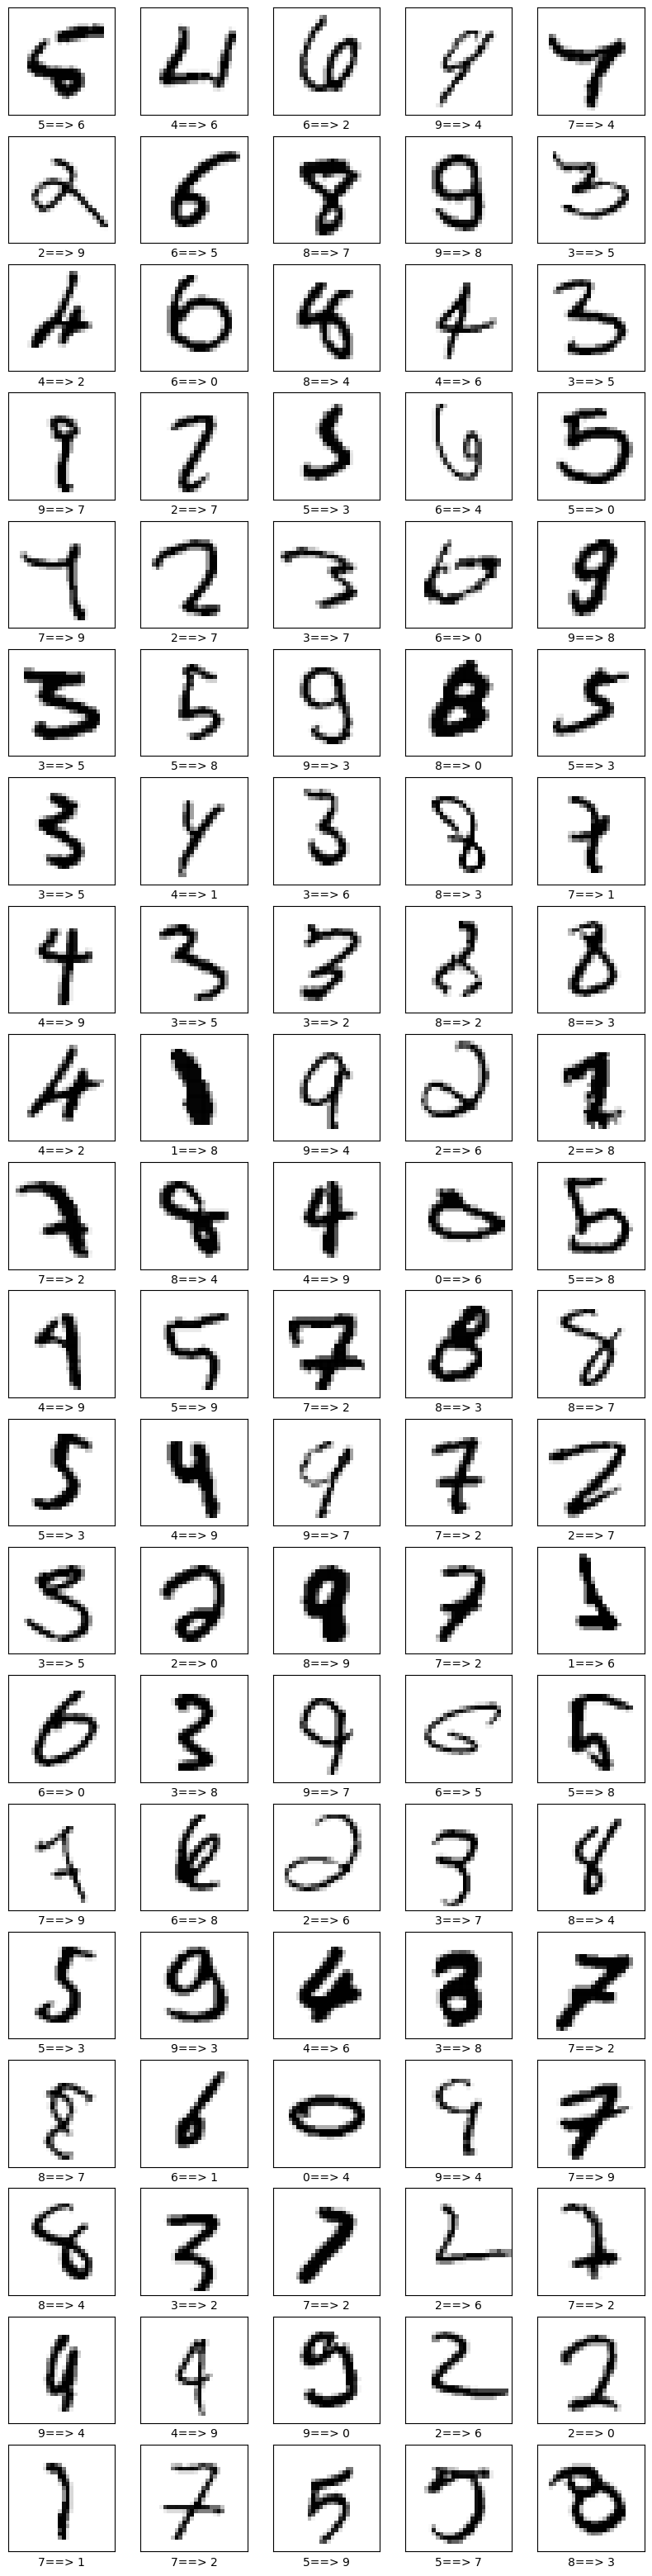

In [33]:
x, t = get_data()
network = init_network()
error = []
predicts = []
for i in range(len(x)):
    y = predict(network, x[i]) 
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스 
    if p != t[i]: # 정답이 아니면 error에 추가
        error.append(i)
        predicts.append(p)

print(error)

plt.figure(figsize=(10,40))
for i in range(100):
    plt.subplot(20, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[error[i]].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(str(t[error[i]]) + "==> " + str(predicts[i]))
plt.show()